In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

# Cutoff

In [2]:
def plot_metrics(values, path_template, xlabel, metric="mae"):
    energies = []
    forces = []
    x_values = []

    for v in values:
        try:
            energy_path = Path(path_template.format(v=v)) / "energy.json"
            force_path = Path(path_template.format(v=v)) / "forces.json"

            energy_data = json.loads(energy_path.read_text())
            force_data = json.loads(force_path.read_text())

            energies.append(energy_data[metric])
            forces.append(force_data[metric])

            # Attempt to convert value to a number for plotting
            try:
                x_values.append(float(v.replace("_", ".")))
            except ValueError:
                # if it fails, we use the index
                x_values.append(len(x_values))

        except FileNotFoundError:
            print(f"Data for value {v} not found. Skipping.")
            continue

    fig, ax = plt.subplots(1, 2, figsize=(6, 3))

    ax[0].scatter(x_values, energies, marker="x")
    ax[0].set_title("Energy MAE")
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel("MAE")

    ax[1].scatter(x_values, forces, marker="x")
    ax[1].set_title("Forces MAE")
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel("MAE")

    fig.tight_layout()
    plt.show()

Data for value 7 not found. Skipping.


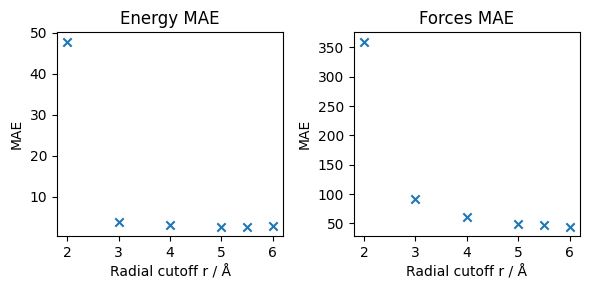

In [3]:
r_max_values = ["2", "3", "4", "5", "5_5", "6", "7"]
plot_metrics(r_max_values, "nodes/r_max/{v}/PredictionMetrics", "Radial cutoff r / Å")

# NN

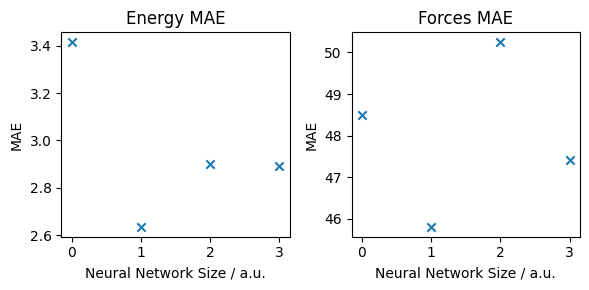

In [4]:
nn_values = ["16-16", "32-32", "64-64", "128-128"]
plot_metrics(nn_values, "nodes/nn/{v}/PredictionMetrics", "Neural Network Size / a.u.")

# N-Basis

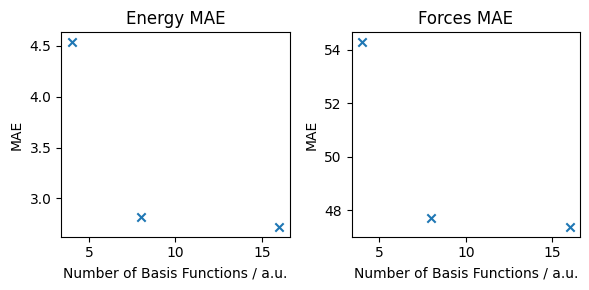

In [5]:
n_basis_values = ["4", "8", "16"]
plot_metrics(
    n_basis_values,
    "nodes/n_basis/{v}/PredictionMetrics",
    "Number of Basis Functions / a.u.",
)